With our app, MyTherapy, patients can set up their therapy as a daily to-do list. The app is connected to a server which saves every completed task (e.g. "Measure blood pressure"). Attached you will find a data set consisting of some users' activities on specific days.

1) Summarizing a data set in a few expressive diagrams or key figures is an important ability.
- Chose 1-3 own diagrams or key figures which, in your opinion, adequately describe the data set
-Please explain why you chose each diagram and what it reveals or demonstrates about the data set.

2) Ideally, we want users to be active every day. Unfortunately, it is common for users to stop using the app at some time. We measure this "churn" with a retention analysis.
- Visualize retention in a diagram. It makes sense to use "app version at time of registration" as cohort.
- What percentage of users are still active on days 1, 7, 30, 90 (respectively)?
- What can we deduce from this? Which version performs best?

3) BONUS: There are two noticeable patterns in the data set. Can you find them? (maybe you have already identified them in task 1)

In [2]:
import pandas as pd
from datetime import timedelta as td

In [3]:
info = pd.read_excel('data.xlsx', sheet_name = 0)

In [4]:
info.drop('Unnamed: 0', axis = 1)

,Name,Explanation,Combined Unique Identifier
0,DATE_JOINED,Date on which specific user joined,NaN
1,USER_ID,Unique user identifier,X
2,DATE_ACTIVITY,Date on which a specific user might show activity,X
3,USER_LTD,Lifetime day: Day X since users registration [...,NaN
4,VERSION_DATE_JOINED,Version at time of registration,NaN
5,VERSION_DATE_ACTIVITY,Version at time of activity,NaN
6,USER_ACTIVITY,1 = User was active on [DATE_ACTIVITY] // 0 =...,NaN


In [5]:
df = pd.read_excel('data.xlsx', sheet_name = 1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86690 entries, 0 to 86689
Data columns (total 7 columns):
DATE_JOINED              86690 non-null datetime64[ns]
USER_ID                  86690 non-null int64
DATE_ACTIVITY            86690 non-null datetime64[ns]
USER_LTD                 86690 non-null int64
VERSION_DATE_JOINED      86690 non-null object
VERSION_DATE_ACTIVITY    86690 non-null object
USER_ACTIVITY            86690 non-null int64
dtypes: datetime64[ns](2), int64(3), object(2)
memory usage: 4.6+ MB


In [7]:
df.head()

,DATE_JOINED,USER_ID,DATE_ACTIVITY,USER_LTD,VERSION_DATE_JOINED,VERSION_DATE_ACTIVITY,USER_ACTIVITY
0,2017-01-13,1106,2017-01-13,0,Version 1.3,Version 1.3,1
1,2017-01-13,1106,2017-01-14,1,Version 1.3,Version 1.3,1
2,2017-01-13,1106,2017-01-15,2,Version 1.3,Version 1.3,1
3,2017-01-13,1106,2017-01-16,3,Version 1.3,Version 1.3,1
4,2017-01-13,1106,2017-01-17,4,Version 1.3,Version 1.3,1


In [8]:
# Check if dates are ok

### What is the most common number of uses per week? 
### How do we define an "active user" in this app context? 
#### for example: maybe it is common to use this specific app only once or twice per week and it is enough to be an "active user"

In [9]:
df['DATE_ACTIVITY'].dt.year.unique()

array([2017])

In [10]:
df['WEEK'] = df['DATE_ACTIVITY'].dt.week
df['MONTH'] = df['DATE_ACTIVITY'].dt.month

In [11]:
df[['WEEK', 'USER_ID', 'USER_ACTIVITY']]\
    .groupby(['WEEK', 'USER_ID'])\
    .sum()\
    .plot(kind = 'hist', bins = 7)

In [12]:
users = df[df['USER_ACTIVITY'] == 1]
users['TASKS'] = 1
users = users[['WEEK', 'USER_ID', 'TASKS']]\
    .groupby(['WEEK', 'USER_ID'])\
    .count()

users_series = []
for i in range(1, 6):
    tmp_users = users[users['TASKS'] >= i]
    users_series.append(
        tmp_users\
            .groupby(['WEEK'])\
            .count()
    )
    
pivoted_by_min_nr_of_tasks = pd.concat(users_series, axis = 1).fillna(0)
pivoted_by_min_nr_of_tasks.columns = ['MIN: '+str(i) for i in range(1,6)]

/home/jacek/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [13]:
# Jak często w tygodniu ludzie korzystają z aplikacji?
# Zdefiniuj na tym podstawie osobę aktywną: x razy na tydzien korzystam z apki
# Narysuj wykres przedstawiający użytkowników aktywnych (bazując na w.w.)
#  !! Spróbuj wykres dzienny/tygodniowy/miesięczy szukając sezonowości

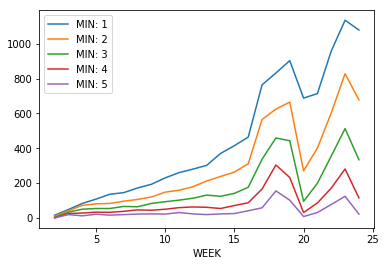

In [14]:
pivoted_by_min_nr_of_tasks.plot()

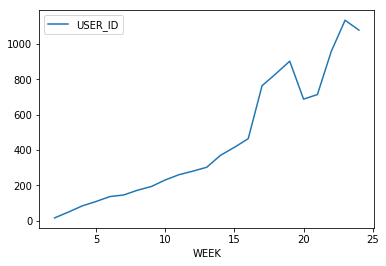

In [15]:
users = df[df['USER_ACTIVITY'] == 1]
users = users[['WEEK', 'USER_ID']]\
    .drop_duplicates()\
    .groupby('WEEK')\
    .count()
users.plot()

In [16]:
# Lepsza wersja wykresu dot. wersji aplikacji, tak jak w google, wykres 100%
# I do tego liczba użytkowników

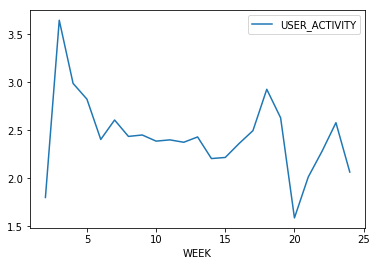

In [168]:
df\
    [df['USER_ACTIVITY'] == 1]\
    [['WEEK', 'USER_ID', 'USER_ACTIVITY']]\
    .groupby(['WEEK', 'USER_ID'])\
    .count()\
    .reset_index()\
    .drop('USER_ID', axis = 1)\
    .groupby('WEEK')\
    .mean()\
    .plot()

In [ ]:
# AVERAGE NUMBER OF WEEKLY TASKS

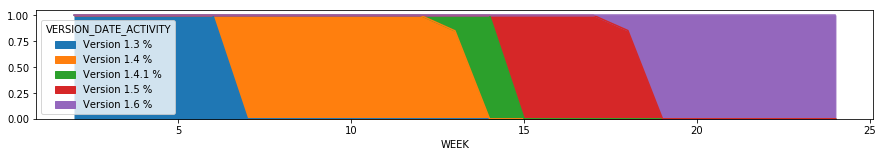

In [17]:
versions = df[['VERSION_DATE_ACTIVITY', 'WEEK', "DATE_ACTIVITY"]]\
    .groupby(['VERSION_DATE_ACTIVITY', 'WEEK'])\
    .count()\
    .reset_index()\
    .pivot(index = 'WEEK', columns = 'VERSION_DATE_ACTIVITY', values = 'DATE_ACTIVITY')

versions['sum'] = versions.sum(axis = 1)
for column in versions.columns.drop('sum'):
    versions[column + ' %'] = versions[column] / versions['sum']
    versions = versions.drop(column, axis = 1)

versions\
    .drop('sum', axis = 1)\
    .plot(kind = 'area', stacked = True, figsize = (15, 2))

In [18]:
import matplotlib.pyplot as plt

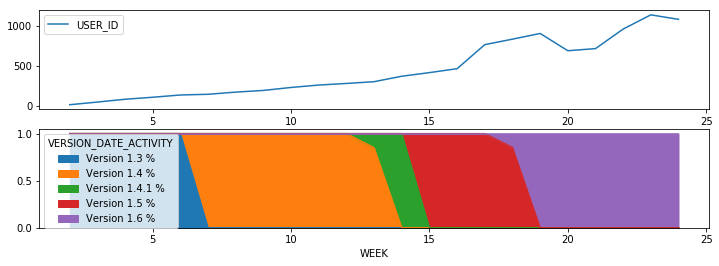

In [19]:
fig, axes = plt.subplots(2, 1, figsize = (12,4))
users_ax = users\
    .plot(ax = axes[0])
versions\
    .drop('sum', axis = 1)\
    .plot(kind = 'area', stacked = True, ax = axes[1])

## Daily retention

In [20]:
# !! Tu jeszze trzeba do każdej retencji usunąć ostatnie X użytkowników, np dla retencji dniowej kiedy
# Zasięg jest na 10 dni, trzeba usunąć użytkowników z ostatnim logowaniem młodszym niż 10 dni temu

In [21]:
max_date = df['DATE_ACTIVITY'].max()

In [22]:
# DAILY RETENTION

In [220]:
sums_of_1d_retention = {ver:{i: 0 for i in range(1, 10)} for ver in 
                            df['VERSION_DATE_JOINED'].unique().tolist() + ['all']}
for user_id in df['USER_ID'].unique():
    tmp_1d_retention = df[df['USER_ID'] == user_id]
    if not tmp_1d_retention[(tmp_1d_retention['USER_ACTIVITY'] == 0)].empty:
        l = len(tmp_1d_retention.loc[: tmp_1d_retention[(tmp_1d_retention['USER_ACTIVITY'] == 0)].index[0] - 1, :])
        v = tmp_1d_retention['VERSION_DATE_JOINED'].values[0]
        if l != 0 and l < 9 and tmp_1d_retention.iloc[-1]['DATE_JOINED'] < max_date - td(days = 10):
            sums_of_1d_retention[v][l] += 1
            sums_of_1d_retention['all'][l] += 1
        elif l == 0:
            pass
        else:
            sums_of_1d_retention[v][9] += 1
            sums_of_1d_retention['all'][9] += 1
            

In [221]:
sums_of_1d_retention = pd.DataFrame().from_dict(sums_of_1d_retention, orient = 'columns')\
                            .sort_index()\
                            .iloc[::-1].cumsum().iloc[::-1]
sums_of_1d_retention = sums_of_1d_retention / sums_of_1d_retention.max(axis = 0)
sums_of_1d_retention

,Version 1.3,Version 1.4,Version 1.4.1,Version 1.5,Version 1.6,all
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,0.736842,0.787149,0.690141,0.748031,0.781065,0.759484
3,0.552632,0.566265,0.338028,0.519685,0.588757,0.540212
4,0.348684,0.401606,0.126761,0.358268,0.452663,0.377086
5,0.230263,0.265060,0.042254,0.218504,0.375740,0.259484
6,0.131579,0.148594,0.014085,0.139764,0.334320,0.183612
7,0.098684,0.104418,0.000000,0.094488,0.286982,0.141123
8,0.039474,0.044177,0.000000,0.047244,0.251479,0.095599
9,0.013158,0.012048,0.000000,0.023622,0.233728,0.072838


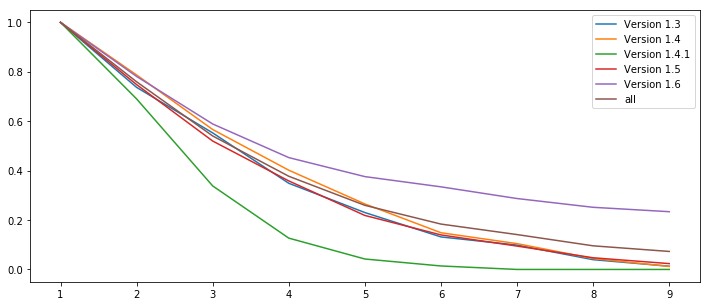

In [222]:
sums_of_1d_retention.plot(figsize = (12, 5))

In [26]:
# From this chart we can see that from short term perspective on retention (day to day) users lost 
# interest faster in case of 1.4.1 version.

## Weekly retention

In [27]:
# Since I cannot calculate (for example) 90 day retention for users who use app for shorter ammount of time then 
# 90 days, I have to limit dataset to users who started using app. Hence, to calculate
# 7d, 30d and 90d (respectively 1w, 4w, 12w) retention I need to limit users to those ones who
# started using an app 7d/30d/90d ago. 

In [194]:
MIN_WEEKS = 12

sums_of_7d_retention = {ver:{i: 0 for i in range(0, MIN_WEEKS + 1)} for ver in 
                            df['VERSION_DATE_JOINED'].unique().tolist() + ['all']}
raw_df_for_7d_retention = df[['WEEK', 'USER_ID', 'VERSION_DATE_JOINED', 'DATE_JOINED', 'USER_ACTIVITY']].drop_duplicates()
raw_df_for_7d_retention = raw_df_for_7d_retention.groupby(['WEEK', 'USER_ID', 'VERSION_DATE_JOINED', 'DATE_JOINED']).max().reset_index()
for user_id in raw_df_for_7d_retention['USER_ID'].unique():
    tmp_7d_retention = raw_df_for_7d_retention[raw_df_for_7d_retention['USER_ID'] == user_id]\
        [['WEEK', 'VERSION_DATE_JOINED', 'DATE_JOINED', 'USER_ACTIVITY']]\
        .groupby(['WEEK', 'DATE_JOINED', "VERSION_DATE_JOINED"])\
        .sum()\
        .reset_index()
    if not tmp_7d_retention[(tmp_7d_retention['USER_ACTIVITY'] == 0)].empty:
        l = len(tmp_7d_retention.loc[: tmp_7d_retention[(tmp_7d_retention['USER_ACTIVITY'] == 0)].index[0] - 1, :])
        v = tmp_7d_retention['VERSION_DATE_JOINED'].values[0]
        if l > MIN_WEEKS:
            l = MIN_WEEKS
        if tmp_7d_retention.iloc[-1]['DATE_JOINED'] < max_date - td(weeks = MIN_WEEKS):
            sums_of_7d_retention[v][l] += 1
            sums_of_7d_retention['all'][l] += 1

In [195]:
sums_of_7d_retention = pd.DataFrame().from_dict(sums_of_7d_retention, orient = 'columns')\
                            .sort_index()\
                            .iloc[::-1].cumsum().iloc[::-1]
sums_of_7d_retention = sums_of_7d_retention / sums_of_7d_retention.max(axis = 0)
sums_of_7d_retention

,Version 1.3,Version 1.4,Version 1.4.1,Version 1.5,Version 1.6,all
0,1.000000,1.000000,NaN,NaN,NaN,1.000000
1,1.000000,1.000000,NaN,NaN,NaN,1.000000
2,1.000000,1.000000,NaN,NaN,NaN,1.000000
3,0.901316,0.969697,NaN,NaN,NaN,0.940000
4,0.546053,0.873737,NaN,NaN,NaN,0.731429
5,0.302632,0.782828,NaN,NaN,NaN,0.574286
6,0.151316,0.712121,NaN,NaN,NaN,0.468571
7,0.098684,0.595960,NaN,NaN,NaN,0.380000
8,0.039474,0.525253,NaN,NaN,NaN,0.314286
9,0.019737,0.388889,NaN,NaN,NaN,0.228571


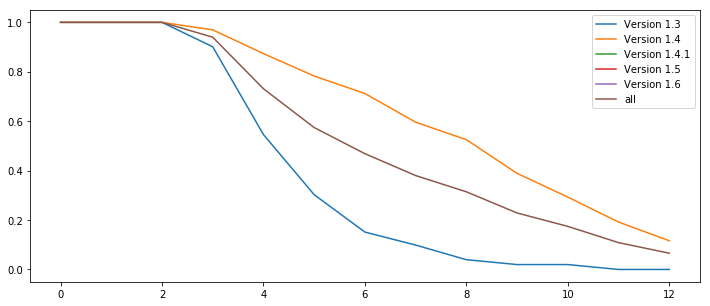

In [196]:
sums_of_7d_retention.plot(figsize = (12,5))

## RFV

In [31]:
# Bonus 3:
# Wylicz dla ostatniego tygodnia przeciętne wartości:
# Recency: kiedy ostatnio byli aktywni
# Frequency: ile dni z tygodnia byli aktywni

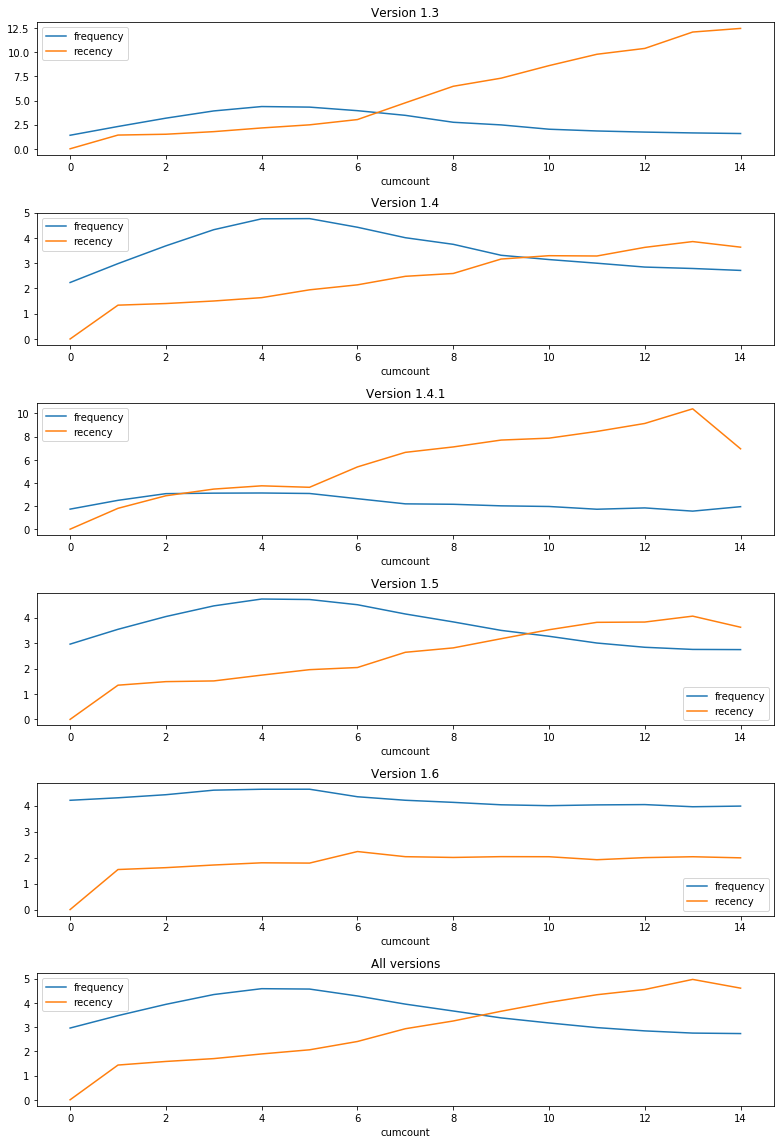

In [170]:
rolling = df\
    [['USER_ID', 'DATE_ACTIVITY', 'USER_ACTIVITY', 'VERSION_DATE_JOINED']]\
    .groupby(['USER_ID', 'DATE_ACTIVITY', 'VERSION_DATE_JOINED'])\
    .sum()

# How often they used an app lately?
rolling['rolling_sum'] = rolling['USER_ACTIVITY']\
    .rolling(7, 1).sum()\
    .fillna(0)

rolling = rolling[rolling['USER_ACTIVITY'] == 1]\
    .drop('USER_ACTIVITY', axis = 1)\
    .reset_index()

# How recent was the last use of app
rolling['days_since_prev_login'] = rolling['DATE_ACTIVITY'] - rolling['DATE_ACTIVITY'].shift(1)

rolling.loc[
    rolling['USER_ID'] != rolling['USER_ID'].shift(1)
, 'days_since_prev_login'] = td(days = 0)
rolling = rolling\
    .fillna(td(days = 0))\
    [['USER_ID', 'VERSION_DATE_JOINED', 'rolling_sum', 'days_since_prev_login']]

rolling['cumcount'] = rolling\
    .groupby(['USER_ID', 'VERSION_DATE_JOINED'])\
    .cumcount()
rolling['days'] = rolling['days_since_prev_login'].dt.days
rolling_results = rolling\
    [['cumcount', 'VERSION_DATE_JOINED', 'rolling_sum', 'days']]\
    .groupby(['cumcount', 'VERSION_DATE_JOINED'])\
    .mean()\
    .reset_index()

fig, axes = plt.subplots(6, 1, figsize = (11, 16))
for i, v in enumerate(rolling_results['VERSION_DATE_JOINED'].unique()):
    a = rolling_results[rolling_results['VERSION_DATE_JOINED'] == v]\
        .drop('VERSION_DATE_JOINED', axis = 1)\
        .set_index('cumcount')\
        .iloc[:15]\
        .plot(ax = axes[i], title = v)
    a.legend(['frequency', 'recency'])
    
b = rolling\
    [['cumcount', 'rolling_sum', 'days']]\
    .groupby(['cumcount'])\
    .mean()\
    .iloc[:15]\
    .plot(ax = axes[i+1], title = 'All versions')
b.legend(['frequency', 'recency'])
    
plt.tight_layout()

In [ ]:
# Further improvement: Create one metric from those two values

# RETENTION

In [34]:
# Ok, but what does it really mean to "stop using an app"?
# - next day they do not use it
# - after X days of not using
# - they don't use it again

# It is important that this measue we can use "now" to draw chart for a real data. The first idea allows that, but
# It is not true in reality - people can use app every second day. Third one is better than this but we cannot use 
# it in real time - we don't know "now" will an user log in "tomorrow". The only good solution is to find number of
# days, when there is a very big chance that user won't use our app again.

In [35]:
# 1: FIND A DEFINITION OF NOT-ACTIVE USER

1382
61


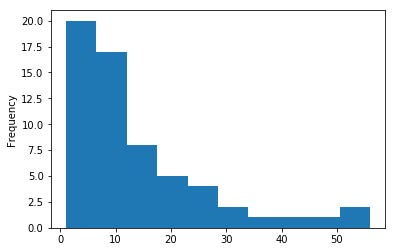

In [106]:
last_login = df[df['USER_ACTIVITY'] == 1]
last_login = last_login[['DATE_ACTIVITY', 'USER_ID']]
last_login['NEXT_USER_DIFF'] = last_login['USER_ID'].shift(-1) != last_login['USER_ID']
last_login['PREV_DAYS_DIFF'] = last_login['DATE_ACTIVITY'] - last_login['DATE_ACTIVITY'].shift(1)
# TO ELIMINATE ONE-TIME LOGIN USERS
last_login['PREV_USER_SAME'] = last_login['USER_ID'] == last_login['USER_ID'].shift(1)
last_login = last_login[last_login['PREV_USER_SAME'] == True]
# TAKE ONLY LAST LOGIN THAT CONTAINS NUMBER OF DAYS BETWEEN LAST LOGIN AND THE ONE BEORE
last_login = last_login[last_login['NEXT_USER_DIFF'] == True]
print(len(last_login['USER_ID'].unique()))
# TO ELIMINATE NEW USERS (THEY CAN STILL LOG IN IN THE FUTURE)
last_login = last_login[last_login['DATE_ACTIVITY'] <= df['DATE_ACTIVITY'].max() - td(days = 30)]
print(len(last_login['USER_ID'].unique()))


last_login['PREV_DAYS_DIFF'].dt.days.plot(kind = 'hist')

In [101]:
# 21 days is enough to consider user as a not - active. In other words, there is 80% chance that we won't
# see again a user if he didn't login for last three weeks. It will be our border line which separates 
# active and not-active users.

In [102]:
len(last_login[last_login['PREV_DAYS_DIFF'] <= td(days = 21)])/len(last_login) * 100

80.32786885245902

In [39]:
# And that will be an advice how to measure not-active users. There is a question about 7-day retention for example,
# But we cannot answer that question with a good confidence, since people often come back to app after mote then 
# 7 days. Hence, we should draw conclusions on timeframe starting minimum three weeks past.

In [40]:
# FOR EVERY RETENTION CALCULATION (1d, 7d, 30d, 90d) We HAVE TO USE DIFFERENT CONDITION FOR JOINED DATE

In [172]:
raw_retention = df[
    (df['DATE_JOINED'] <= df['DATE_ACTIVITY'].max() - td(days = 90)) &
    (df['USER_ACTIVITY'] == 1)
]

In [173]:
len(raw_retention['USER_ID'].unique())

329

In [178]:
len(df['USER_ID'].unique())

1385

In [174]:
retention_results = {ver:{i: 0 for i in range(0, 300)} for ver in 
                            df['VERSION_DATE_JOINED'].unique().tolist() + ['all']}

for user_id in raw_retention['USER_ID'].unique():
    tmp_raw_ret = raw_retention[raw_retention['USER_ID'] == user_id]
    tmp_raw_ret['days_diff'] = tmp_raw_ret['DATE_ACTIVITY'] - tmp_raw_ret['DATE_ACTIVITY'].shift(1)
    if not tmp_raw_ret[tmp_raw_ret['days_diff'] >= td(days = 21)].empty:
        # he stopped using an app
        tmp_raw_with_condition = tmp_raw_ret.loc[: tmp_raw_ret[tmp_raw_ret['days_diff'] >= td(days = 21)].index[0], :]
        last_date = tmp_raw_with_condition.iloc[-1]['DATE_ACTIVITY']
        registration_date = tmp_raw_with_condition.iloc[-1]['DATE_JOINED']
        d = last_date - registration_date
    else:
        # he is still using it
        last_date = df['DATE_ACTIVITY'].max() - td(days = 21)
        registration_date = tmp_raw_ret.iloc[-1]['DATE_JOINED']
        d = last_date - registration_date
    
    v = tmp_raw_ret['VERSION_DATE_JOINED'].values[0]
    retention_results[v][d.days] += 1
    retention_results['all'][d.days] += 1

/home/jacek/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [181]:
retention_df = pd.DataFrame().from_dict(retention_results, orient = 'columns')\
                            .sort_index()\
                            .iloc[::-1].cumsum().iloc[::-1]
retention_df = retention_df / retention_df.max(axis = 0) * 100
retention_df.iloc[91]

Version 1.3      39.473684
Version 1.4      47.457627
Version 1.4.1          NaN
Version 1.5            NaN
Version 1.6            NaN
all              43.768997
Name: 91, dtype: float64

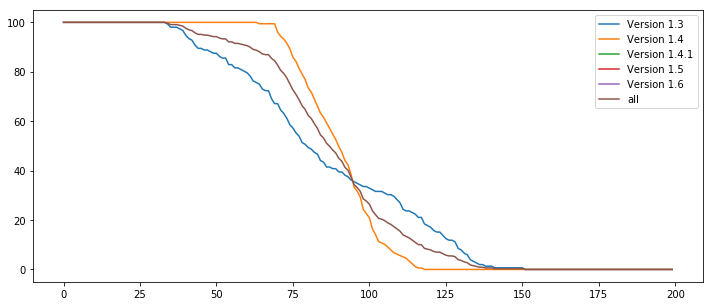

In [177]:
retention_df.iloc[:200].plot(figsize = (12, 5))

# TODO

In [146]:
# Bonus 2:
# Czy jest jakiś szczególny wzór dzięki któremu użytkownicy są 

# Y:
# -> Dłużej aktywni? 
# -> Da się przwidzieć czy zrezygnują z korzystania z aplikacji?

# X:
# -> Dodaj zmienne if_weekend
# -> Dodaj informację o konsekwencji (for each row how active he was lately)
# -> Dodaj zmienną daily_tasks_number

# -> Zsumuj, zrób tabelę 2x2 
# -> Przeprować dla tych zmiennych test White'a aby sprawdzić czy zmienne są zależne

In [147]:
# I na dole powtórzone tylko wykresy (w Dash'u)

In [148]:
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objects as go

In [149]:
init_notebook_mode(connected=True)

In [204]:
go.Figure(
    [go.Scatter(
        y = sums_of_1d_retention[version].iloc[:10] * 100,
        name = version,
    ) for version in sums_of_1d_retention.columns],
    layout = go.Layout(
        width = 700,
        height = 300,
        xaxis = {
            'title': 'Number of passed days'
        },
        yaxis = {
            'title': 'Percent of active users'
        },
        title = 'Daily retention',
        margin = {
            't': 50,
            'b': 50,
            'l': 20,
            'r': 20
        }
    )
)

In [140]:
go.Figure(
    [go.Histogram(
        x = last_login['PREV_DAYS_DIFF'].dt.days,
        name = 'a',
        xbins = {
            'start': 0, 
            'end': 60,
            'size': 5
        }
    )],
    layout = go.Layout(
        width = 300,
        height = 300,
        xaxis = {
            'title': 'Number of passed days'
        },
        yaxis = {
            'title': 'Number of occurences'
        },
        title = 'What is the gap before last app use',
        margin = {
            't': 50,
            'b': 50,
            'l': 20,
            'r': 20
        }
    )
)

In [237]:
go.Figure(
    [go.Scatter(
        y = pivoted_by_min_nr_of_tasks[nr],
        name = nr,
    ) for nr in pivoted_by_min_nr_of_tasks.columns],
    layout = go.Layout(
        width = 700,
        height = 300,
        xaxis = {
            'title': 'Week'
        },
        yaxis = {
            'title': 'Number of users'
        },
        title = 'Active users categorized by minimum number of tasks per week',
        margin = {
            't': 50,
            'b': 50,
            'l': 20,
            'r': 20
        }
    )
)

In [242]:
go.Figure(
    [go.Scatter(
        y = versions[nr].fillna(0),
        name = nr,
        stackgroup='one' 
    ) for nr in versions.drop('sum', axis = 1).columns],
    layout = go.Layout(
        width = 700,
        height = 300,
        xaxis = {
            'title': 'Week'
        },
        yaxis = {
            'title': 'Number of users'
        },
        title = 'Active users categorized by minimum number of tasks per week',
        margin = {
            't': 50,
            'b': 50,
            'l': 20,
            'r': 20
        }
    )
)

In [243]:
from plotly.subplots import make_subplots

In [272]:
fig = make_subplots(
    rows=6, 
    cols=1,
    subplot_titles = rolling_results['VERSION_DATE_JOINED'].unique().tolist() + ['Overall']
)
colors = {
    'rolling_sum': 'blue',
    'days': 'green'
}

for i, v in enumerate(rolling_results['VERSION_DATE_JOINED'].unique()):
    a = rolling_results[rolling_results['VERSION_DATE_JOINED'] == v]\
        .drop('VERSION_DATE_JOINED', axis = 1)\
        .set_index('cumcount')\
        .iloc[:15]
    for metric in a.columns:
        fig.append_trace(go.Scatter(
            x = a.index,
            y = a[metric],
            name = metric,
            marker = {
                'color': colors[metric]
            }
        ), row=i+1, col=1)

b = rolling\
    [['cumcount', 'rolling_sum', 'days']]\
    .groupby(['cumcount'])\
    .mean()\
    .iloc[:15]
for metric in b.columns:
    fig.append_trace(go.Scatter(
        x = b.index,
        y = b[metric],
        name = metric,
        marker = {
            'color': colors[metric]
        }
    ), row=6, col=1)

fig.update_layout(
    showlegend = False,
    height = 2000,
    xaxis = {
        'title': 'Days since registration'
    },
)
fig.show()

In [289]:
go.Figure(
    [
        go.Scatter(
            x = a.index,
            y = a['rolling_sum'],
            name = 'Average number of tasks',
        ),
        go.Scatter(
            x = a.index,
            y = a['days'],
            name = 'Average size of gap',
        )
    ],
    layout = go.Layout(
        width = 700,
        height = 300,
#         xaxis = {
#             'title': 'Days since registration'
#         },
        title = {
            'text': 'Version 1.6: weekly recency and frequency'
        },
        margin = {
            't': 50,
            'b': 50,
            'l': 20,
            'r': 20
        },
        legend_orientation = 'h'
    )
)

In [ ]:
# Further steps: Investigate which activities perform the best (causes attachment to an app)